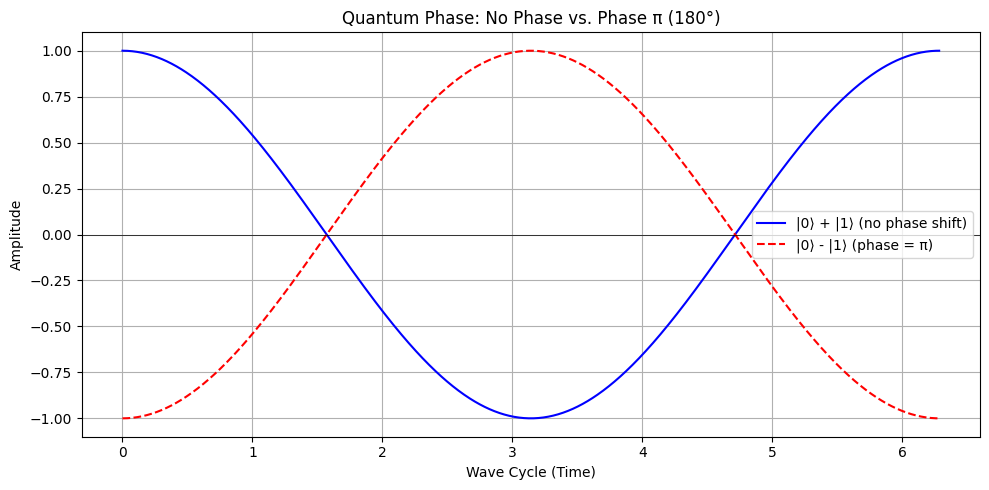

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time axis
t = np.linspace(0, 2 * np.pi, 1000)

# Basic wave (cosine)
wave_0 = np.cos(t)

# Phase-shifted wave (cosine with phase pi = 180 degrees)
wave_pi = np.cos(t + np.pi)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, wave_0, label='|0⟩ + |1⟩ (no phase shift)', color='blue')
plt.plot(t, wave_pi, label='|0⟩ - |1⟩ (phase = π)', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Quantum Phase: No Phase vs. Phase π (180°)")
plt.xlabel("Wave Cycle (Time)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


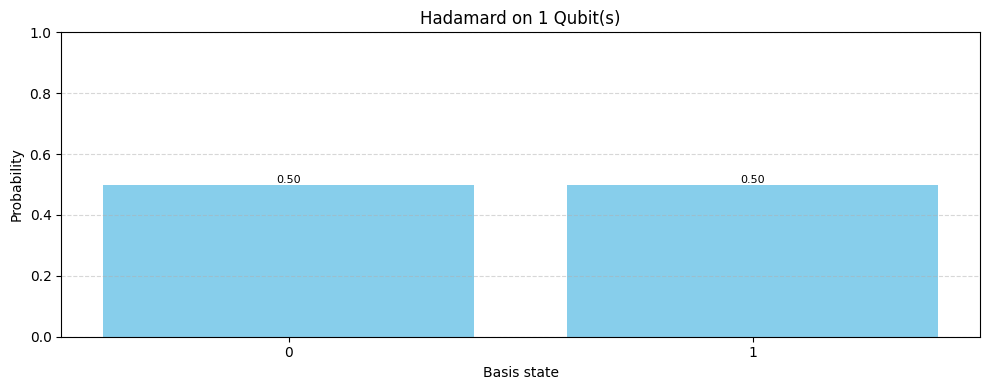

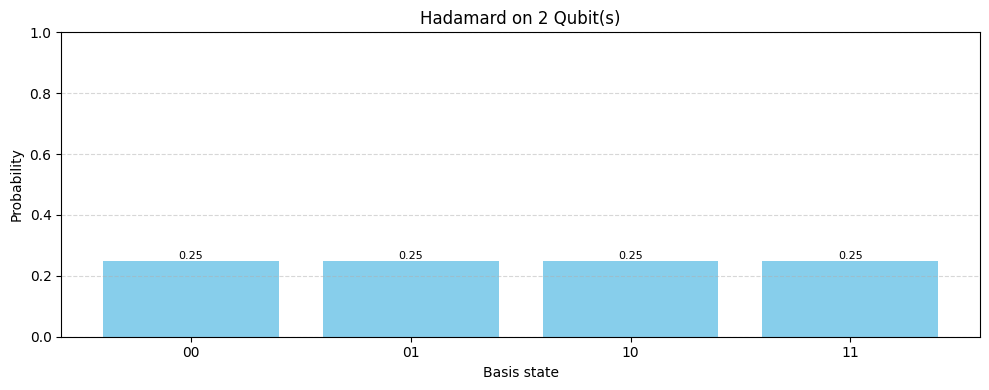

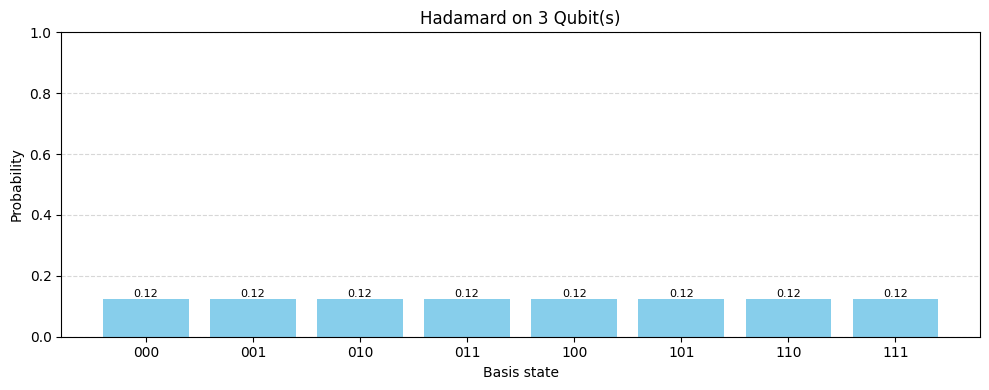

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import kron

# Define Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]])

# Define |0⟩
zero = np.array([[1],
                 [0]])

def apply_hadamards(num_qubits):
    # Start in |000...0⟩
    state = zero
    for _ in range(num_qubits - 1):
        state = kron(state, zero)
    
    # Build full Hadamard operator H⊗H⊗...⊗H
    H_full = H
    for _ in range(num_qubits - 1):
        H_full = kron(H_full, H)
    
    # Apply Hadamard to the initial state
    final_state = H_full @ state
    
    return final_state.flatten()

def plot_state_amplitudes(state_vector, num_qubits):
    num_states = len(state_vector)
    x_labels = [format(i, f'0{num_qubits}b') for i in range(num_states)]
    amplitudes = np.abs(state_vector)**2  # Convert complex amplitudes to probabilities

    plt.figure(figsize=(10, 4))
    bars = plt.bar(x_labels, amplitudes, color='skyblue')
    plt.xlabel('Basis state')
    plt.ylabel('Probability')
    plt.title(f'Hadamard on {num_qubits} Qubit(s)')
    plt.ylim(0, 1)
    for bar, amp in zip(bars, amplitudes):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{amp:.2f}', 
                 ha='center', va='bottom', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Visualize Hadamard results for 1, 2, and 3 qubits
for n in [1, 2, 3]:
    state = apply_hadamards(n)
    plot_state_amplitudes(state, n)


In [3]:
import numpy as np
from numpy import kron

# Define Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]])

# Define |0⟩
zero = np.array([[1],
                 [0]])

def apply_hadamards(num_qubits):
    # Start in |000...0⟩
    state = zero
    for _ in range(num_qubits - 1):
        state = kron(state, zero)
    
    # Build full H⊗H⊗...⊗H
    H_full = H
    for _ in range(num_qubits - 1):
        H_full = kron(H_full, H)
    
    # Apply Hadamard to the initial state
    final_state = H_full @ state
    
    # Print result
    print(f"\nHadamard on {num_qubits} qubit(s), starting from |{'0'*num_qubits}⟩:")
    for i, amp in enumerate(final_state.flatten()):
        binary = format(i, f'0{num_qubits}b')
        print(f"|{binary}⟩: amplitude = {amp}")
        
# Try with 1, 2, and 3 qubits
apply_hadamards(1)
apply_hadamards(2)
apply_hadamards(3)



Hadamard on 1 qubit(s), starting from |0⟩:
|0⟩: amplitude = 0.7071067811865475
|1⟩: amplitude = 0.7071067811865475

Hadamard on 2 qubit(s), starting from |00⟩:
|00⟩: amplitude = 0.4999999999999999
|01⟩: amplitude = 0.4999999999999999
|10⟩: amplitude = 0.4999999999999999
|11⟩: amplitude = 0.4999999999999999

Hadamard on 3 qubit(s), starting from |000⟩:
|000⟩: amplitude = 0.3535533905932737
|001⟩: amplitude = 0.3535533905932737
|010⟩: amplitude = 0.3535533905932737
|011⟩: amplitude = 0.3535533905932737
|100⟩: amplitude = 0.3535533905932737
|101⟩: amplitude = 0.3535533905932737
|110⟩: amplitude = 0.3535533905932737
|111⟩: amplitude = 0.3535533905932737
